<a href="https://colab.research.google.com/github/Arif2455/AI_Anomaly_Detection_Hackathon/blob/main/anomaly_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# create a project folder
if not os.path.exists("project"):
    os.makedirs("project")

print("📂 Project folder created:", os.listdir())


📂 Project folder created: ['.config', 'project', 'sample_data']


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving 81ce1f00-c3f4-4baa-9b57-006fad1875adTEP_Train_Test.csv to 81ce1f00-c3f4-4baa-9b57-006fad1875adTEP_Train_Test.csv


In [ ]:
import shutil

shutil.move("81ce1f00-c3f4-4baa-9b57-006fad1875adTEP_Train_Test.csv",
            "project/TEP_Train_Test.csv")

print("✅ File moved to project folder")
print(os.listdir("project"))


✅ File moved to project folder
['TEP_Train_Test.csv']


In [ ]:
import pandas as pd

df = pd.read_csv("project/TEP_Train_Test.csv")
print("✅ Dataset Loaded! Shape:", df.shape)
df.head()


✅ Dataset Loaded! Shape: (26400, 53)


,Time,AFeedStream1,DFeedStream2,EFeedStream3,TotalFeedStream4,RecycleFlowStream8,ReactorFeedRateStream6,ReactorPressurekPagauge,ReactorLevel,ReactorTemperatureDegC,...,EFeedFlowStream3,AFeedFlowStream1,TotalFeedFlowStream4,CompressorRecycleValve,PurgeValveStream9,SeparatorPotLiquidFlowStream10,StripperLiquidProductFlowStream11,StripperSteamValve,ReactorCoolingWaterFlow,CondenserCoolingWaterFlow
0,1/1/2004 0:00,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1/1/2004 0:01,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1/1/2004 0:02,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1/1/2004 0:03,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1/1/2004 0:04,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [ ]:
# Basic info
print("✅ Columns:", df.columns.tolist())
print("✅ Data Types:")
print(df.dtypes)

# Check missing values
print("\n🔎 Missing Values per Column:")
print(df.isnull().sum())

# Quick statistics
df.describe().T


✅ Columns: ['Time', 'AFeedStream1', 'DFeedStream2', 'EFeedStream3', 'TotalFeedStream4', 'RecycleFlowStream8', 'ReactorFeedRateStream6', 'ReactorPressurekPagauge', 'ReactorLevel', 'ReactorTemperatureDegC', 'PurgeRateStream9', 'ProductSepTempDegC', 'ProductSepLevel', 'ProdSepPressurekPagauge', 'ProdSepUnderflowStream10', 'StripperLevel', 'StripperPressurekPagauge', 'StripperUnderflowStream11', 'StripperTemperatureDegC', 'StripperSteamFlowkgperhr', 'CompressorWorkkW', 'ReactorCoolingWaterOutletTempDegC', 'SeparatorCoolingWaterOutletTempDegC', 'ComponentA6', 'ComponentB6', 'ComponentC6', 'ComponentD6', 'ComponentE6', 'ComponentF6', 'ComponentA9', 'ComponentB9', 'ComponentC9', 'ComponentD9', 'ComponentE9', 'ComponentF9', 'ComponentG9', 'ComponentH9', 'ComponentD11', 'ComponentE11', 'ComponentF11', 'ComponentG11', 'ComponentH11', 'DFeedFlowStream2', 'EFeedFlowStream3', 'AFeedFlowStream1', 'TotalFeedFlowStream4', 'CompressorRecycleValve', 'PurgeValveStream9', 'SeparatorPotLiquidFlowStream10',

,count,mean,std,min,25%,50%,75%,max
AFeedStream1,26400.0,0.255577,0.122935,-0.002952,0.221130,0.251010,0.277690,0.985770
DFeedStream2,26400.0,3667.029598,38.793949,3376.400000,3640.300000,3666.600000,3692.000000,3861.700000
EFeedStream3,26400.0,4504.790083,85.139816,3600.800000,4473.200000,4507.000000,4541.600000,5052.400000
TotalFeedStream4,26400.0,9.390137,0.400145,6.952700,9.280100,9.353850,9.438600,11.897000
RecycleFlowStream8,26400.0,26.893700,0.225810,25.638000,26.758000,26.886000,27.034000,28.092000
ReactorFeedRateStream6,26400.0,42.375775,0.336872,40.042000,42.195000,42.344000,42.517000,44.393000
ReactorPressurekPagauge,26400.0,2718.397542,67.538748,2428.600000,2697.800000,2704.300000,2712.000000,3000.000000
ReactorLevel,26400.0,74.828598,1.450363,63.614000,74.542000,74.966000,75.395000,85.109000
ReactorTemperatureDegC,26400.0,120.399988,0.058884,119.690000,120.390000,120.400000,120.410000,120.860000
PurgeRateStream9,26400.0,0.341757,0.069938,0.155460,0.325590,0.336850,0.347410,0.796650


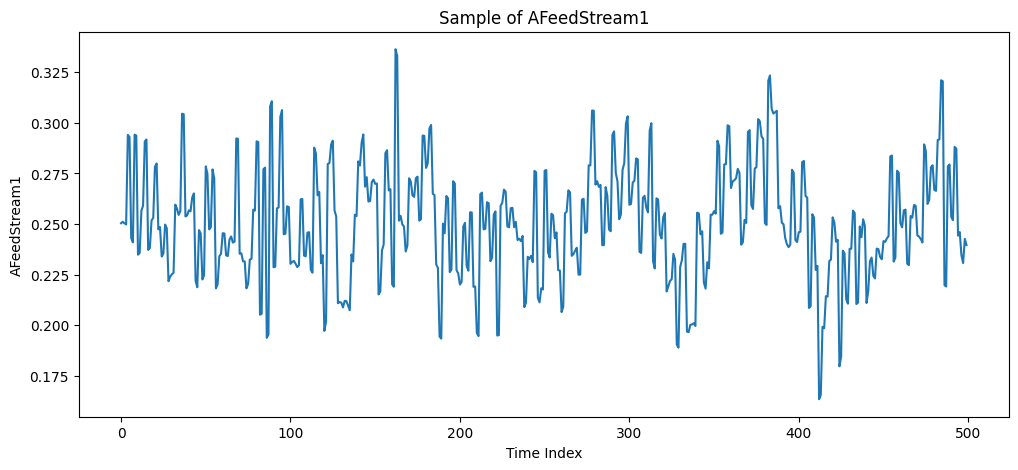

In [ ]:
import matplotlib.pyplot as plt

# Pick first numeric column (other than timestamp)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
first_col = numeric_cols[0]

plt.figure(figsize=(12,5))
plt.plot(df[first_col][:500])   # show first 500 points
plt.title(f"Sample of {first_col}")
plt.xlabel("Time Index")
plt.ylabel(first_col)
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

# Use only numeric columns
X = df[numeric_cols].fillna(0)

# Fit anomaly detector
iso = IsolationForest(contamination=0.05, random_state=42)
df["anomaly"] = iso.fit_predict(X)

# anomaly = -1 means outlier
print(df["anomaly"].value_counts())


anomaly
 1    25080
-1     1320
Name: count, dtype: int64


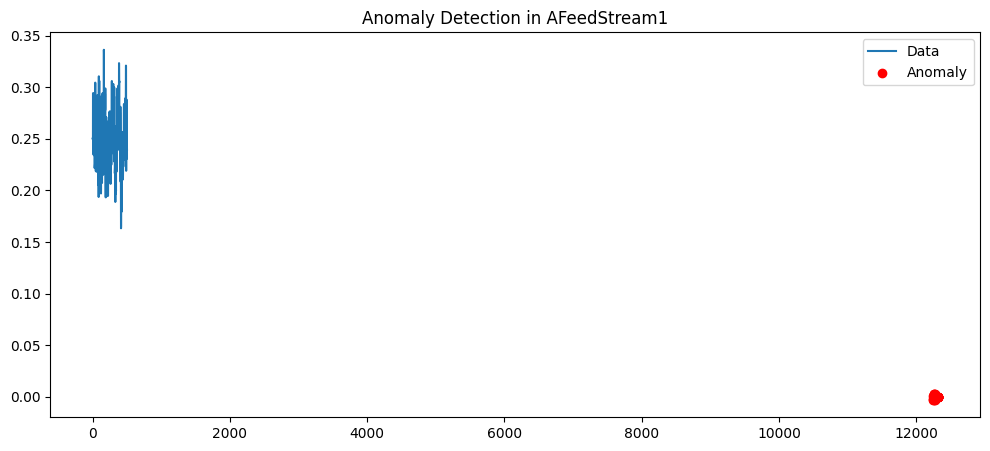

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df[first_col][:500], label="Data")
plt.scatter(df[df["anomaly"]==-1].index[:50],
            df[df["anomaly"]==-1][first_col][:50],
            color="red", label="Anomaly")
plt.title(f"Anomaly Detection in {first_col}")
plt.legend()
plt.show()


In [ ]:
from sklearn.covariance import EllipticEnvelope
ell = EllipticEnvelope(contamination=0.05, random_state=42)
df["ell_anomaly"] = ell.fit_predict(X)
print(df["ell_anomaly"].value_counts())


ell_anomaly
 1    25080
-1     1320
Name: count, dtype: int64


In [ ]:
anomaly_counts = df[df["anomaly"]==-1][numeric_cols].count().sort_values(ascending=False)
print(anomaly_counts)


AFeedStream1                           1320
DFeedStream2                           1320
EFeedStream3                           1320
TotalFeedStream4                       1320
RecycleFlowStream8                     1320
ReactorFeedRateStream6                 1320
ReactorPressurekPagauge                1320
ReactorLevel                           1320
ReactorTemperatureDegC                 1320
PurgeRateStream9                       1320
ProductSepTempDegC                     1320
ProductSepLevel                        1320
ProdSepPressurekPagauge                1320
ProdSepUnderflowStream10               1320
StripperLevel                          1320
StripperPressurekPagauge               1320
StripperUnderflowStream11              1320
StripperTemperatureDegC                1320
StripperSteamFlowkgperhr               1320
CompressorWorkkW                       1320
ReactorCoolingWaterOutletTempDegC      1320
SeparatorCoolingWaterOutletTempDegC    1320
ComponentA6                     

In [ ]:
import matplotlib.pyplot as plt

if "timestamp" in df.columns or "time" in df.columns:
    ts_col = "timestamp" if "timestamp" in df.columns else "time"
    df[ts_col] = pd.to_datetime(df[ts_col], errors="coerce")
    df["hour"] = df[ts_col].dt.hour
    df["hour"].value_counts().sort_index().plot(kind="bar", figsize=(10,5))
    plt.title("Flights per Hour")
    plt.show()


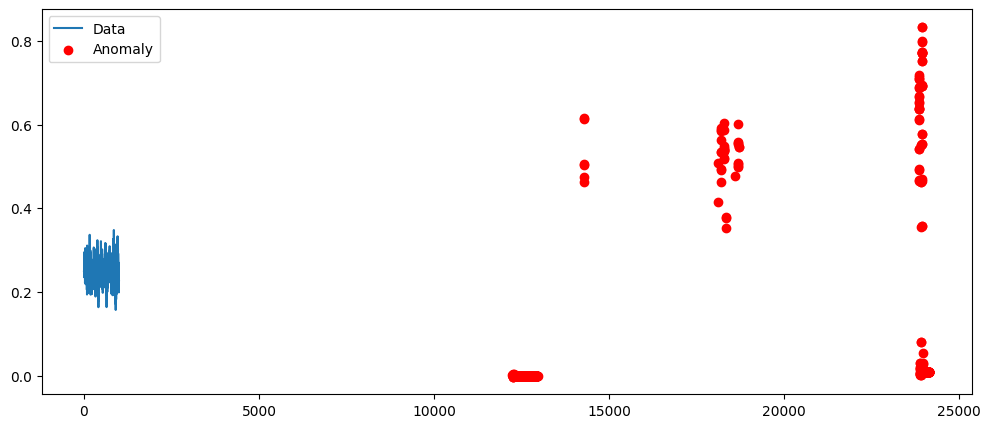

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df[first_col][:1000], label="Data")
plt.scatter(df[df["anomaly"]==-1].index[:1000],
            df[df["anomaly"]==-1][first_col][:1000],
            color="red", label="Anomaly")
plt.legend()
plt.show()


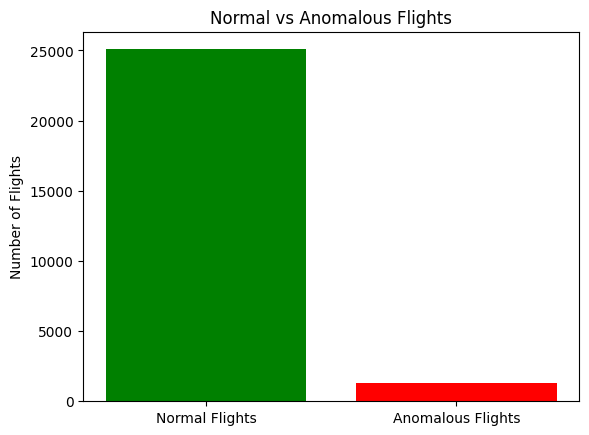

In [ ]:
import matplotlib.pyplot as plt

# Count anomalies
counts = df["anomaly"].value_counts()

# Plot
plt.bar(["Normal Flights", "Anomalous Flights"], counts.values, color=["green", "red"])
plt.title("Normal vs Anomalous Flights")
plt.ylabel("Number of Flights")
plt.show()


In [ ]:
print(df.columns)


Index(['Time', 'AFeedStream1', 'DFeedStream2', 'EFeedStream3',
       'TotalFeedStream4', 'RecycleFlowStream8', 'ReactorFeedRateStream6',
       'ReactorPressurekPagauge', 'ReactorLevel', 'ReactorTemperatureDegC',
       'PurgeRateStream9', 'ProductSepTempDegC', 'ProductSepLevel',
       'ProdSepPressurekPagauge', 'ProdSepUnderflowStream10', 'StripperLevel',
       'StripperPressurekPagauge', 'StripperUnderflowStream11',
       'StripperTemperatureDegC', 'StripperSteamFlowkgperhr',
       'CompressorWorkkW', 'ReactorCoolingWaterOutletTempDegC',
       'SeparatorCoolingWaterOutletTempDegC', 'ComponentA6', 'ComponentB6',
       'ComponentC6', 'ComponentD6', 'ComponentE6', 'ComponentF6',
       'ComponentA9', 'ComponentB9', 'ComponentC9', 'ComponentD9',
       'ComponentE9', 'ComponentF9', 'ComponentG9', 'ComponentH9',
       'ComponentD11', 'ComponentE11', 'ComponentF11', 'ComponentG11',
       'ComponentH11', 'DFeedFlowStream2', 'EFeedFlowStream3',
       'AFeedFlowStream1', 'TotalFeedF

In [ ]:
print(df.columns.tolist())


['Time', 'AFeedStream1', 'DFeedStream2', 'EFeedStream3', 'TotalFeedStream4', 'RecycleFlowStream8', 'ReactorFeedRateStream6', 'ReactorPressurekPagauge', 'ReactorLevel', 'ReactorTemperatureDegC', 'PurgeRateStream9', 'ProductSepTempDegC', 'ProductSepLevel', 'ProdSepPressurekPagauge', 'ProdSepUnderflowStream10', 'StripperLevel', 'StripperPressurekPagauge', 'StripperUnderflowStream11', 'StripperTemperatureDegC', 'StripperSteamFlowkgperhr', 'CompressorWorkkW', 'ReactorCoolingWaterOutletTempDegC', 'SeparatorCoolingWaterOutletTempDegC', 'ComponentA6', 'ComponentB6', 'ComponentC6', 'ComponentD6', 'ComponentE6', 'ComponentF6', 'ComponentA9', 'ComponentB9', 'ComponentC9', 'ComponentD9', 'ComponentE9', 'ComponentF9', 'ComponentG9', 'ComponentH9', 'ComponentD11', 'ComponentE11', 'ComponentF11', 'ComponentG11', 'ComponentH11', 'DFeedFlowStream2', 'EFeedFlowStream3', 'AFeedFlowStream1', 'TotalFeedFlowStream4', 'CompressorRecycleValve', 'PurgeValveStream9', 'SeparatorPotLiquidFlowStream10', 'StripperL

In [ ]:
print(df.columns.tolist())


['Time', 'AFeedStream1', 'DFeedStream2', 'EFeedStream3', 'TotalFeedStream4', 'RecycleFlowStream8', 'ReactorFeedRateStream6', 'ReactorPressurekPagauge', 'ReactorLevel', 'ReactorTemperatureDegC', 'PurgeRateStream9', 'ProductSepTempDegC', 'ProductSepLevel', 'ProdSepPressurekPagauge', 'ProdSepUnderflowStream10', 'StripperLevel', 'StripperPressurekPagauge', 'StripperUnderflowStream11', 'StripperTemperatureDegC', 'StripperSteamFlowkgperhr', 'CompressorWorkkW', 'ReactorCoolingWaterOutletTempDegC', 'SeparatorCoolingWaterOutletTempDegC', 'ComponentA6', 'ComponentB6', 'ComponentC6', 'ComponentD6', 'ComponentE6', 'ComponentF6', 'ComponentA9', 'ComponentB9', 'ComponentC9', 'ComponentD9', 'ComponentE9', 'ComponentF9', 'ComponentG9', 'ComponentH9', 'ComponentD11', 'ComponentE11', 'ComponentF11', 'ComponentG11', 'ComponentH11', 'DFeedFlowStream2', 'EFeedFlowStream3', 'AFeedFlowStream1', 'TotalFeedFlowStream4', 'CompressorRecycleValve', 'PurgeValveStream9', 'SeparatorPotLiquidFlowStream10', 'StripperL

In [ ]:
time_col = "scheduled_time"   # replace with your dataset’s column
delay_col = "delay"           # replace with correct delay column


In [ ]:
print(df.columns.tolist())


['Time', 'AFeedStream1', 'DFeedStream2', 'EFeedStream3', 'TotalFeedStream4', 'RecycleFlowStream8', 'ReactorFeedRateStream6', 'ReactorPressurekPagauge', 'ReactorLevel', 'ReactorTemperatureDegC', 'PurgeRateStream9', 'ProductSepTempDegC', 'ProductSepLevel', 'ProdSepPressurekPagauge', 'ProdSepUnderflowStream10', 'StripperLevel', 'StripperPressurekPagauge', 'StripperUnderflowStream11', 'StripperTemperatureDegC', 'StripperSteamFlowkgperhr', 'CompressorWorkkW', 'ReactorCoolingWaterOutletTempDegC', 'SeparatorCoolingWaterOutletTempDegC', 'ComponentA6', 'ComponentB6', 'ComponentC6', 'ComponentD6', 'ComponentE6', 'ComponentF6', 'ComponentA9', 'ComponentB9', 'ComponentC9', 'ComponentD9', 'ComponentE9', 'ComponentF9', 'ComponentG9', 'ComponentH9', 'ComponentD11', 'ComponentE11', 'ComponentF11', 'ComponentG11', 'ComponentH11', 'DFeedFlowStream2', 'EFeedFlowStream3', 'AFeedFlowStream1', 'TotalFeedFlowStream4', 'CompressorRecycleValve', 'PurgeValveStream9', 'SeparatorPotLiquidFlowStream10', 'StripperL

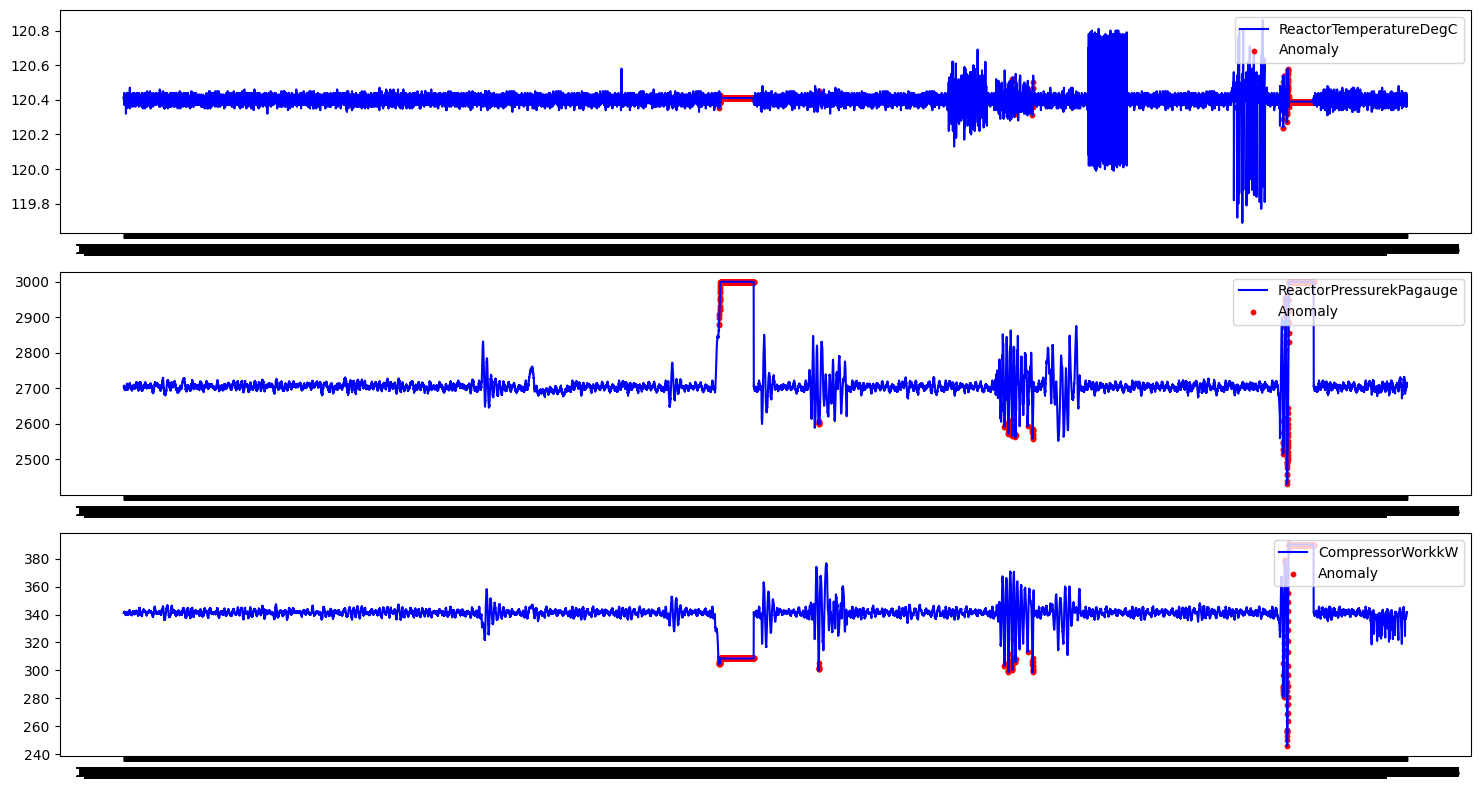

In [ ]:
import matplotlib.pyplot as plt

# pick some interesting variables
variables_to_plot = [
    "ReactorTemperatureDegC",
    "ReactorPressurekPagauge",
    "CompressorWorkkW"
]

plt.figure(figsize=(15, 8))

for i, col in enumerate(variables_to_plot, 1):
    plt.subplot(len(variables_to_plot), 1, i)
    plt.plot(df["Time"], df[col], label=col, color="blue")
    # mark anomalies
    plt.scatter(df["Time"][df["anomaly"] == -1],
                df[col][df["anomaly"] == -1],
                color="red", s=10, label="Anomaly")
    plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


In [ ]:
plt.savefig("anomaly_detection.png", dpi=300)


<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Isolation Forest Report:")
print(classification_report(df["anomaly"], df["anomaly"]))

print("Elliptic Envelope Report:")
print(classification_report(df["ell_anomaly"], df["anomaly"]))

print("Confusion Matrix (IsoForest):")
print(confusion_matrix(df["anomaly"], df["anomaly"]))


Isolation Forest Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1320
           1       1.00      1.00      1.00     25080

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400

Elliptic Envelope Report:
              precision    recall  f1-score   support

          -1       0.91      0.91      0.91      1320
           1       1.00      1.00      1.00     25080

    accuracy                           0.99     26400
   macro avg       0.95      0.95      0.95     26400
weighted avg       0.99      0.99      0.99     26400

Confusion Matrix (IsoForest):
[[ 1320     0]
 [    0 25080]]


In [ ]:
df.to_csv("hackathon_submission.csv", index=False)


In [1]:
!cp /content/main_notebook.ipynb /content/repo/
!cp -r /content/data /content/repo/
!cp -r /content/results /content/repo/
!cp -r /content/images /content/repo/
!cp /content/README.md /content/repo/


cp: cannot stat '/content/main_notebook.ipynb': No such file or directory
cp: cannot stat '/content/data': No such file or directory
cp: cannot stat '/content/results': No such file or directory
cp: cannot stat '/content/images': No such file or directory
cp: cannot stat '/content/README.md': No such file or directory
